# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [55]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [56]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


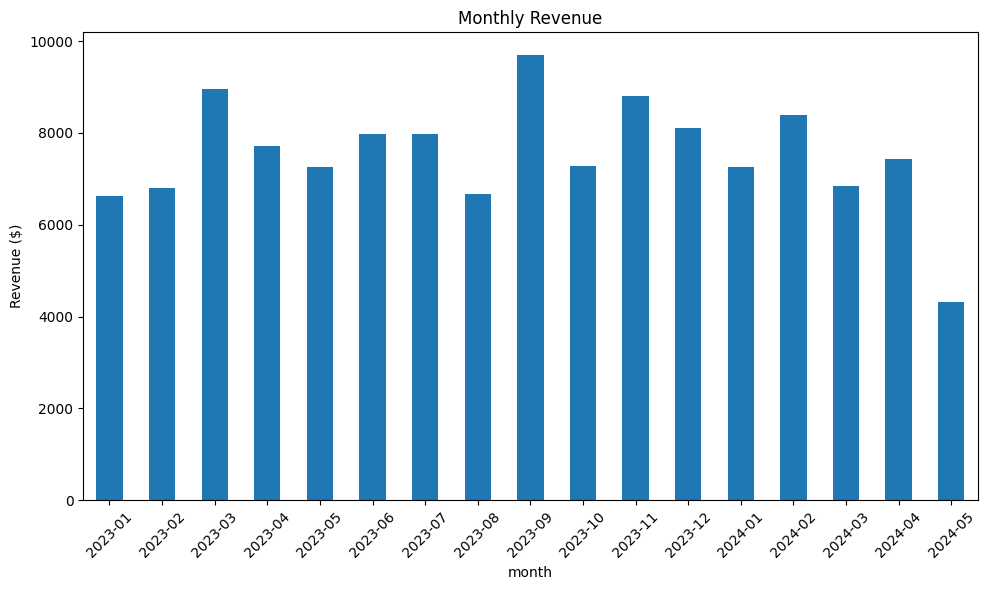

In [57]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

month
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
Freq: M, Name: revenue, dtype: float64


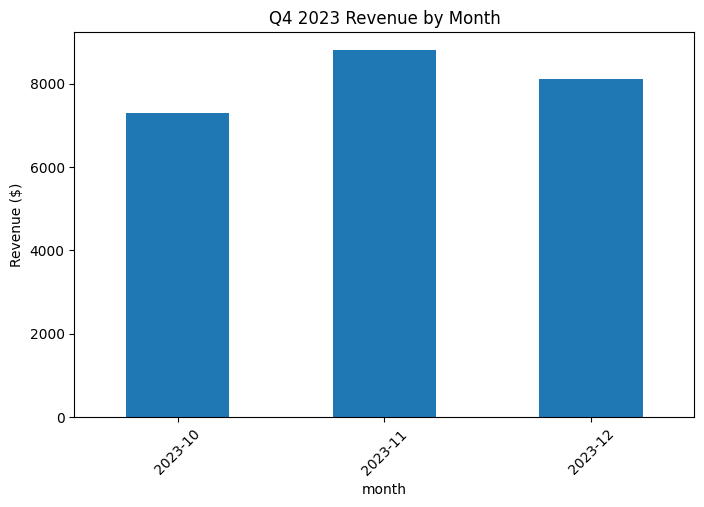

In [58]:
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

q4_months = pd.period_range("2023-10", "2023-12", freq="M")
q4_data = data[data["month"].isin(q4_months)]
revenue_q4 = q4_data.groupby("month")["revenue"].sum()

print(revenue_q4)

revenue_q4.plot(kind="bar", figsize=(8,5), title="Q4 2023 Revenue by Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

### Q1. Interpretation:

- This data indicates a notable increase in revenue from October to November, peaking in November with the highest sales. This likely reflects increased customer spending, potentially driven by seasonal factors such as holiday shopping promotions or Black Friday sales. December’s revenue slightly dips from November but remains strong, consistent with holiday season demand sustaining elevated sales levels.

- The upward trend from October to November followed by sustained strong performance in December suggests effective marketing and sales strategies during the critical holiday quarter. This gives TechMart valuable insight that November is a key month for revenue generation, and maintaining or boosting promotional efforts during these months could maximize profitability.

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

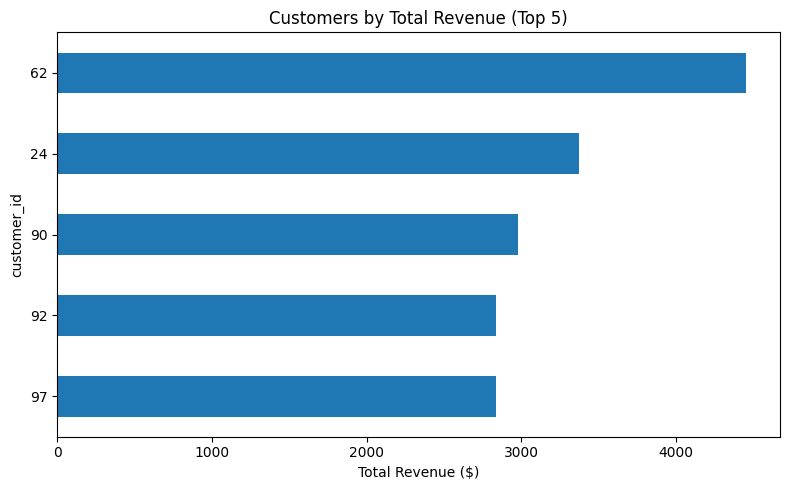

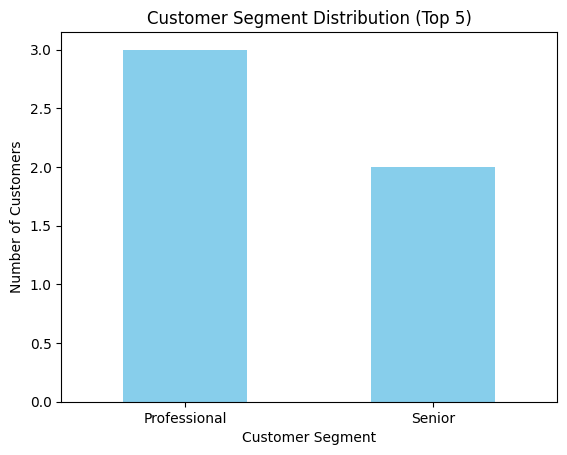

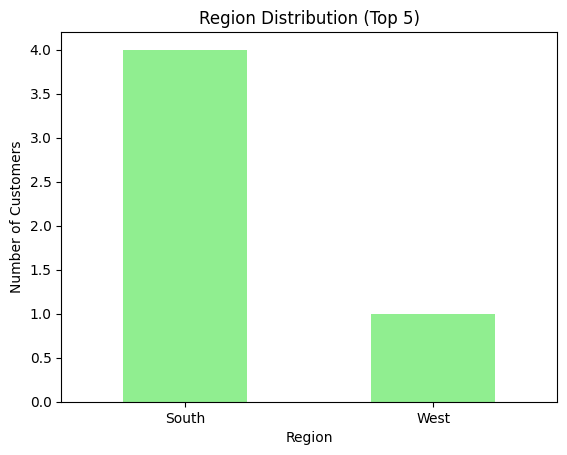

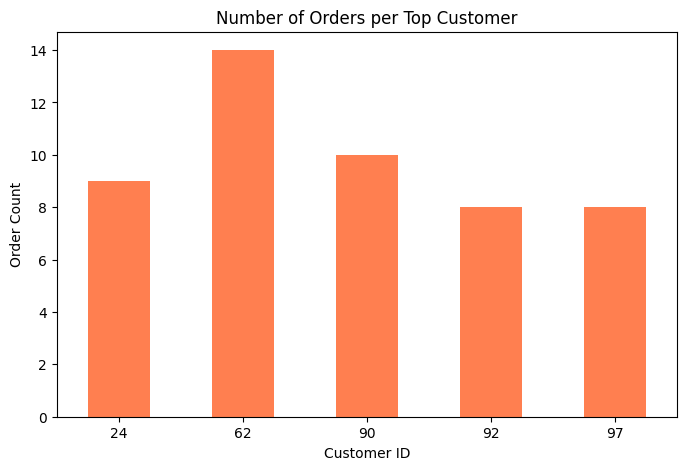

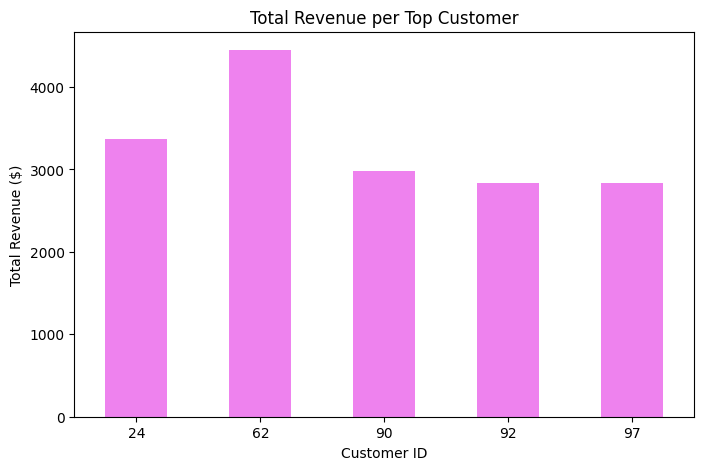

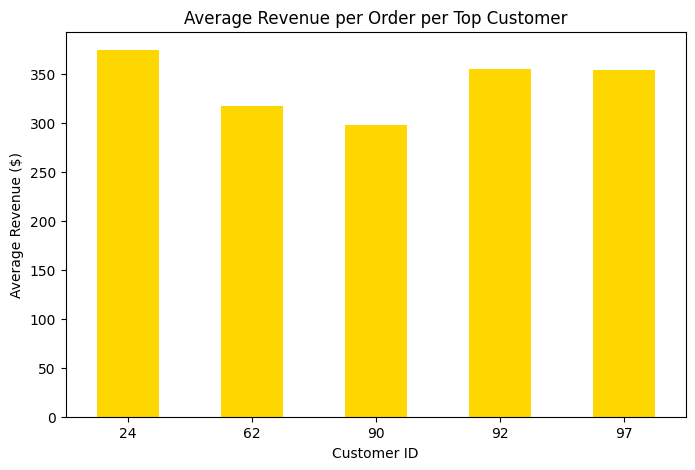

In [59]:
top_customers = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
top_customers_data = data[data['customer_id'].isin(top_customers.index)]

summary = top_customers_data.groupby('customer_id').agg({
    'customer_segment': 'first',
    'region': 'first',
    'order_id': 'count',
    'revenue': ['sum', 'mean']
})

# Plot 0: Top 5 customers by total revenue
top_customers.plot(kind='barh', figsize=(8,5), title='Customers by Total Revenue (Top 5)')
plt.xlabel('Total Revenue ($)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 1: Customer segment distribution among top customers
segment_counts = summary['customer_segment']['first'].value_counts()
segment_counts.plot(kind='bar', color='skyblue', title='Customer Segment Distribution (Top 5)')
plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.show()

# Plot 2: Regional distribution among top customers
region_counts = summary['region']['first'].value_counts()
region_counts.plot(kind='bar', color='lightgreen', title='Region Distribution (Top 5)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.show()

# Plot 3: Number of orders per top customer
summary[('order_id', 'count')].plot(kind='bar', color='coral', figsize=(8,5), title='Number of Orders per Top Customer')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.ylabel('Order Count')
plt.show()

# Plot 4: Total revenue per top customer
summary[('revenue', 'sum')].plot(kind='bar', color='violet', figsize=(8,5), title='Total Revenue per Top Customer')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.ylabel('Total Revenue ($)')
plt.show()

# Plot 5: Average order revenue per top customer
summary[('revenue', 'mean')].plot(kind='bar', color='gold', figsize=(8,5), title='Average Revenue per Order per Top Customer')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.ylabel('Average Revenue ($)')
plt.show()

### Q2. Interpretation:

- **Customer Segments**: Three out of the five top customers belong to the "Professional" segment, while two belong to the "Senior" segment. This reveals that professionals tend to spend more overall, but seniors also represent significant revenue contributors.

- **Regional Concentrations**: Four of the top five customers are located in the "South" region and one in the "West," indicating that the South region may have more loyal or higher-spending customers.

- **Order Frequency and Spending**: The number of orders ranges from 8 to 14 per customer. Despite varying order counts, average revenue per order ranges between $297 and $374, showing consistency in spending levels. This suggests these customers repeatedly engage with the platform, boosting total revenue.

- **Product Variety**: The sample transactions cover diverse product categories like Books, Clothing, and Sports, implying these customers have varied interests rather than concentrating on a single category.

- **Payment Methods and Discounts**: Transactions include different payment methods and occasional use of discounts, indicating flexibility or responsiveness to promotions without heavily relying on discounts.

**Business Insight**: The top customers are predominantly professionals in the South region who purchase frequently across multiple categories with healthy average order values. Targeted loyalty programs for professionals, with a regional focus on the South, can increase customer lifetime value. Additionally, promoting diverse product categories and personalized promotions may nurture these relationships further and convert frequent buyers into brand advocates.

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


/tmp/ipykernel_12707/3899275981.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_segment.index, y=avg_revenue_segment.values, palette="pastel")


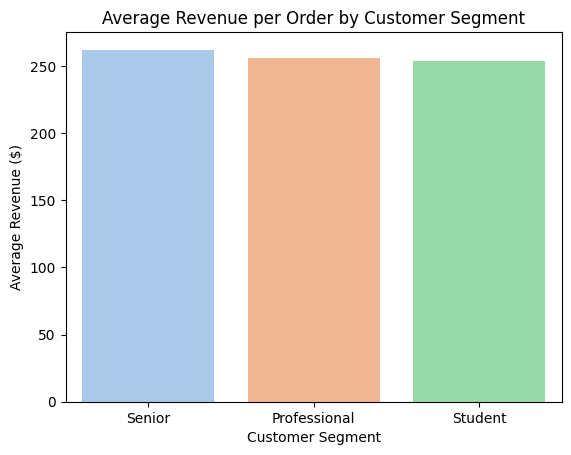

In [60]:
avg_revenue_segment = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)

print(avg_revenue_segment)

sns.barplot(x=avg_revenue_segment.index, y=avg_revenue_segment.values, palette="pastel")
plt.title('Average Revenue per Order by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Revenue ($)')
plt.show()

### Q3. Interpretation:

 Seniors have the highest average revenue per order ($262.13).

 Professionals closely follow ($255.65).
 
 Students have a slightly lower average ($253.81).

- This suggests that senior customers tend to make slightly higher value purchases on average, possibly buying bigger quantities or more premium products. The Professional segment, despite their slightly lower average spend per order, may still be valuable due to possible higher order frequency or total revenue contribution, as seen previously.

- The relatively close values indicate that all three segments contribute similarly on an order-by-order basis, so focusing on tailored strategies per segment beyond just average spend is wise—for instance, targeting Seniors with premium offerings and Professionals with volume or loyalty incentives.

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Total Revenue by Region:
region
East     31221.80
North    34351.69
South    34839.45
West     27727.73
Name: revenue, dtype: float64

Average Order Size by Region:
region
East     240.167692
North    258.283383
South    274.326378
West     252.070273
Name: revenue, dtype: float64


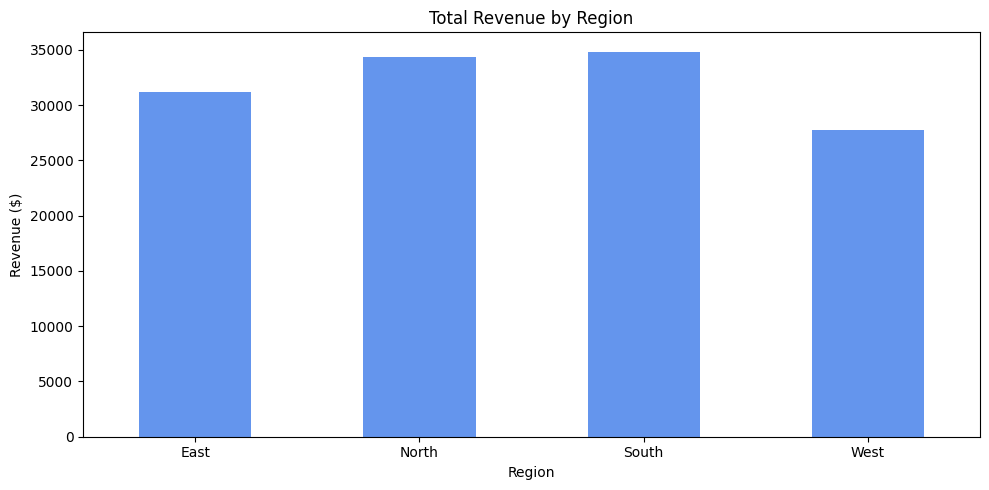

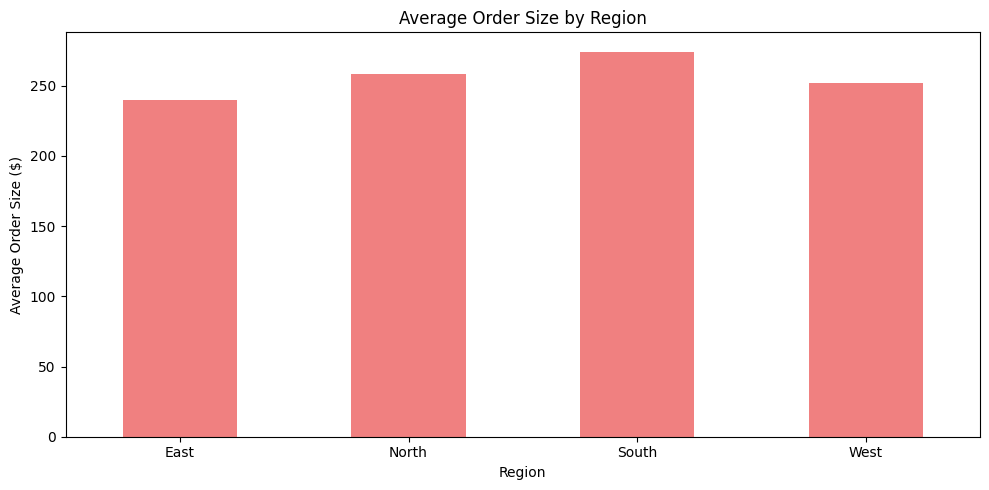

In [61]:
total_revenue_region = data.groupby('region')['revenue'].sum()
avg_order_size_region = data.groupby('region')['revenue'].mean()

print("Total Revenue by Region:")
print(total_revenue_region)
print("\nAverage Order Size by Region:")
print(avg_order_size_region)

plt.figure(figsize=(10,5))
total_revenue_region.plot(kind='bar', color='cornflowerblue', title='Total Revenue by Region')
plt.ylabel('Revenue ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
avg_order_size_region.plot(kind='bar', color='lightcoral', title='Average Order Size by Region')
plt.ylabel('Average Order Size ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Q4. Interpretation:

- **Total Revenue by Region**: The South leads slightly with approximately $34,839, followed closely by the North at $34,352. The East and West regions generate smaller total revenues of $31,222 and $27,728 respectively. This suggests that South and North regions represent TechMart’s largest markets or customer bases by overall sales volume.

- **Average Order Size by Region**: South again leads with the highest average order size of $274.33, indicating customers here typically spend more per transaction. North follows with $258.28, West $252.07, and East least with $240.17. This points to the South region not only generating the most revenue but also having higher value orders, a strong combination for profitability.

**Business Insights:**

- The South region likely contains loyal, high-spending customers contributing both high frequency and order size. This makes South the priority for targeted promotions, premium product campaigns, or enhanced customer experience investments. The North’s strong showing in total revenue and average order size similarly qualifies it as a key market for resources.

- The East and West regions, while contributing less, still show respectable average order sizes. Growth strategies such as localized marketing or expansion of popular product lines could be applied here.


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Quantity Sold by Product Category:
product_category
Books          227
Clothing       253
Electronics    239
Home           269
Sports         246
Name: quantity, dtype: int64

Revenue by Product Category:
product_category
Books          24046.06
Clothing       24804.57
Electronics    25498.31
Home           29871.47
Sports         23920.26
Name: revenue, dtype: float64


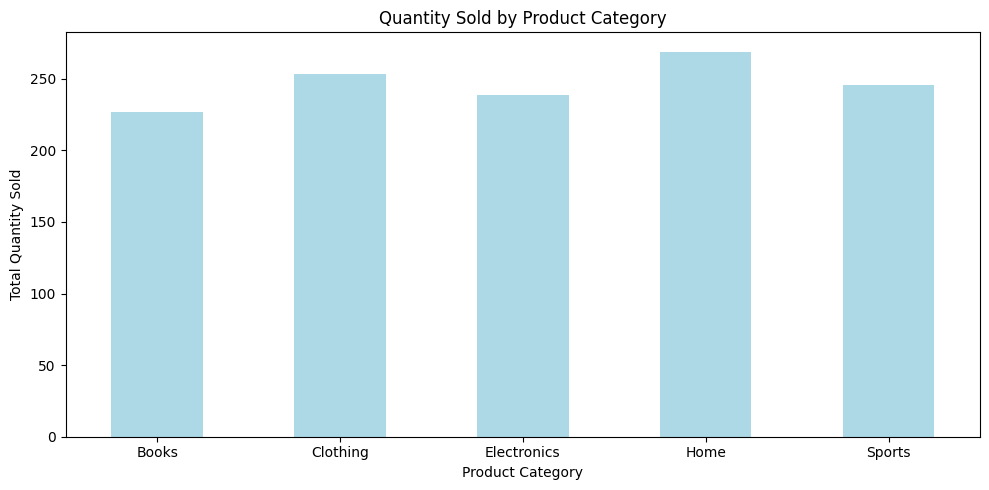

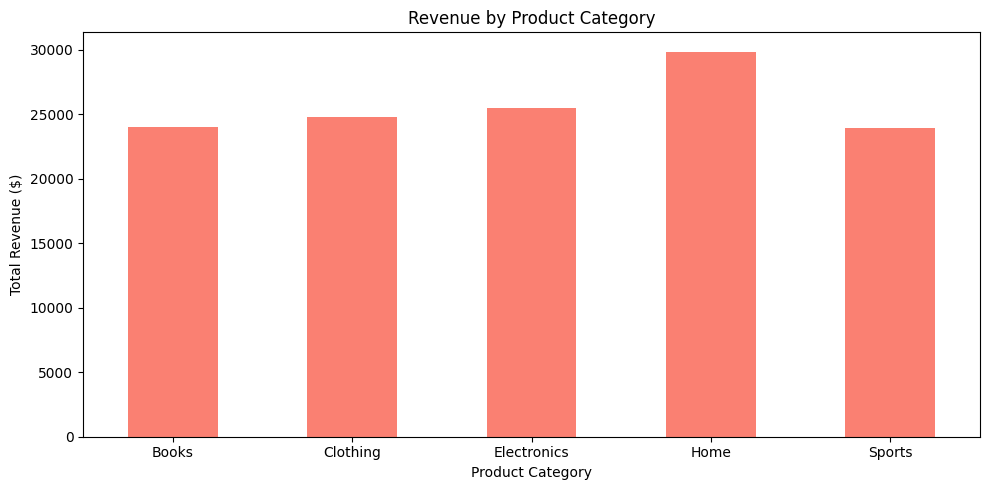

In [62]:
quantity_by_category = data.groupby('product_category')['quantity'].sum()
revenue_by_category = data.groupby('product_category')['revenue'].sum()

print("Quantity Sold by Product Category:")
print(quantity_by_category)
print("\nRevenue by Product Category:")
print(revenue_by_category)

quantity_by_category.plot(kind='bar', color='lightblue', title='Quantity Sold by Product Category', figsize=(10,5))
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

revenue_by_category.plot(kind='bar', color='salmon', title='Revenue by Product Category', figsize=(10,5))
plt.ylabel('Total Revenue ($)')
plt.xlabel('Product Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Q5. Interpretation:

- **Quantity Sold**: Home leads with 269 units sold, followed by Clothing (253), Sports (246), Electronics (239), and Books (227). This indicates Home and Clothing are the most frequently purchased categories in terms of units.

- **Revenue**: Home generates the highest revenue at $29,871, aligning with its high quantity sold. Electronics follows with $25,498, reflecting its higher average unit price despite fewer units than Home or Clothing. Clothing and Books round out the middle, while Sports has the lowest revenue.

**Business Insights:**

- The Home category appears to be a core revenue driver balancing both high volume and unit prices.

- Electronics achieves substantial revenue likely due to higher ticket prices per item, signifying its importance to profitability despite lower quantities.

- Clothing is popular by quantity but slightly lower in total revenue, indicating medium-to-low unit prices.

- Sports and Books, while lower revenue generators, still contribute meaningful volume.

- This balanced demand suggests TechMart should:

    - Maintain robust inventory and promotion for Home and Electronics for profitability.

    - Leverage Clothing’s popularity with volume-focused marketing.

    - Monitor Sports and Books as niche categories with potential growth through targeted campaigns.

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Average Revenue per Discounted Order: $263.83
Average Revenue per Non-Discounted Order: $248.30


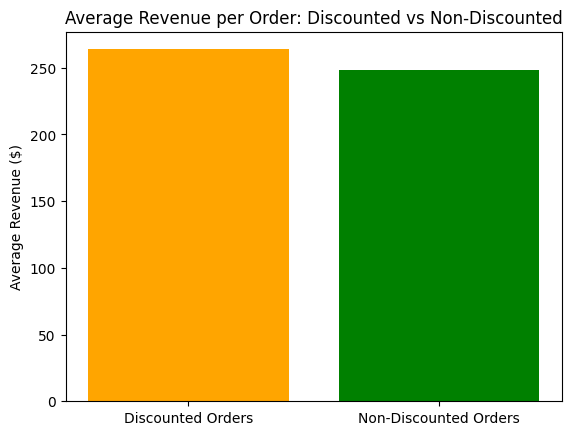

In [63]:
discounted_orders = data[data['discount_applied'] > 0]
non_discounted_orders = data[data['discount_applied'] == 0]

avg_rev_discounted = discounted_orders['revenue'].mean()
avg_rev_non_discounted = non_discounted_orders['revenue'].mean()

print(f"Average Revenue per Discounted Order: ${avg_rev_discounted:.2f}")
print(f"Average Revenue per Non-Discounted Order: ${avg_rev_non_discounted:.2f}")

comparison = [avg_rev_discounted, avg_rev_non_discounted]
labels = ['Discounted Orders', 'Non-Discounted Orders']

plt.bar(labels, comparison, color=['orange', 'green'])
plt.title('Average Revenue per Order: Discounted vs Non-Discounted')
plt.ylabel('Average Revenue ($)')
plt.show()

### Q6. Interpretation: 

- Average Revenue per Discounted Order: $263.83

- Average Revenue per Non-Discounted Order: $248.30

**Business Insights:**

- This indicates that discounts are driving larger purchases rather than just lowering the overall revenue per order. It could imply customers respond to discounted prices by adding more items or opting for premium products to maximize the value of the deal.

    - Offering discounts may encourage customers to buy more items or higher-value products per transaction, effectively increasing the average order value (AOV).

- Offering discounts with conditions like minimum purchase thresholds, limited-time offers, or product bundling can optimize the balance between attracting customers and preserving margins.

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Order Percentage by Payment Method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue by Payment Method:
payment_method
Credit Card    257.444234
Debit Card     275.980650
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


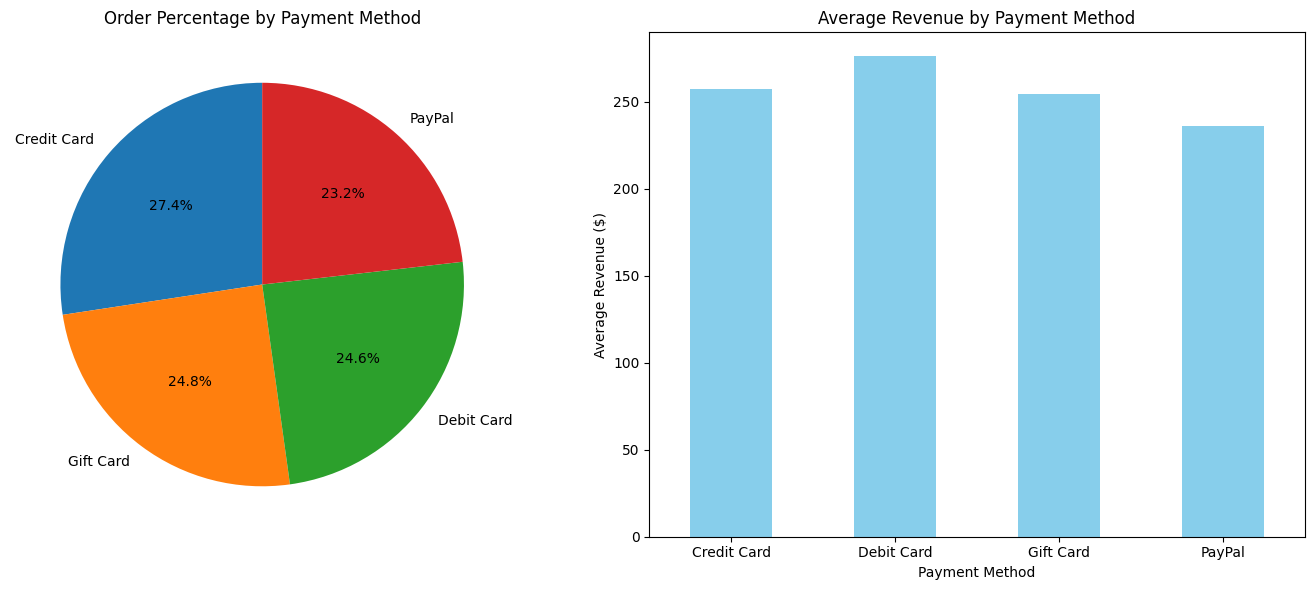

In [64]:
payment_method_pct = data['payment_method'].value_counts(normalize=True) * 100

avg_rev_payment_method = data.groupby('payment_method')['revenue'].mean()

print("Order Percentage by Payment Method:")
print(payment_method_pct)
print("\nAverage Revenue by Payment Method:")
print(avg_rev_payment_method)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

payment_method_pct.plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0], legend=False, title="Order Percentage by Payment Method")
axes[0].set_ylabel('')

avg_rev_payment_method.plot.bar(ax=axes[1], color='skyblue', title="Average Revenue by Payment Method")
axes[1].set_ylabel('Average Revenue ($)')
axes[1].set_xlabel('Payment Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Q7. Interpretation: 

- **Order Percentage by Payment Method**:

    - Credit Card is the most popular payment method (~27.4% of all orders). 

    - Gift Card and Debit Card are nearly tied in usage (~24.8% and ~24.6% of all orders, respectively).

    - PayPal is slightly less used (~23.2% of all orders).

- **Average Revenue by Payment Method**:

    - Customers paying with Debit Card spend the most on average per order ($275.98), suggesting high-value transactions via this method.

    - Credit Card and Gift Card follow, and are nearly tied in average order value ($257.44 and $254.36, respectively), reinforcing their importance.

    - PayPal users spend slightly less on average ($236.07), indicating room for growth or promotion.

**Business Insights:**

- TechMart should ensure a smooth experience across all four popular payment options to cater to diverse preferences.

- Marketing and payment promotions targeting Debit and Credit Cards could drive higher value sales.

- Encouraging PayPal usage more actively might boost average order sizes further.

- Maintaining payment method diversity helps retain different customer segments and reduces friction or abandonment.



### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64


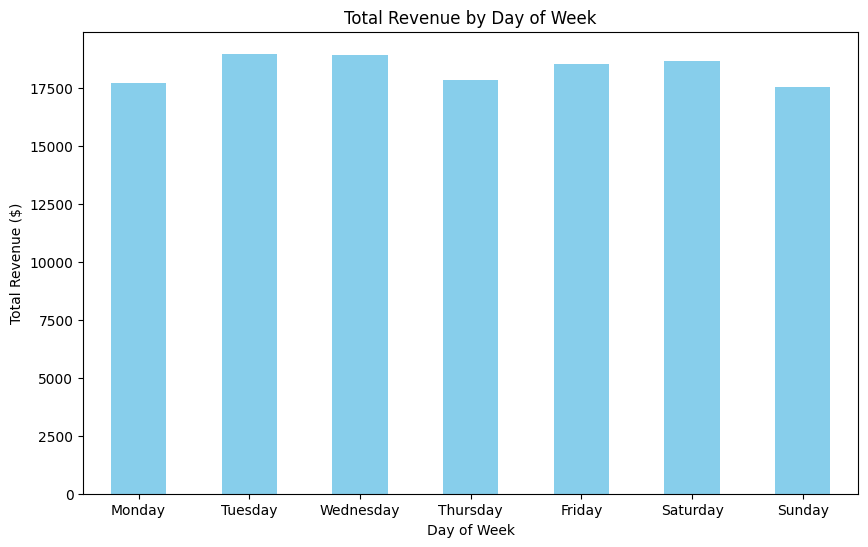

In [65]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = data.groupby('day_of_week')['revenue'].sum().reindex(days_order)
print(revenue_by_day)

plt.figure(figsize=(10,6))
revenue_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.show()

### Q8. Interpretation: 

- Revenue is fairly evenly distributed across the week, with Tuesday and Wednesday showing the highest revenues (~$18,900 each).

- Monday and Sunday show the lowest revenues (~$17,530 to $17,700), but the variation is moderate.

- Weekends (Saturday and Sunday) do not show a clearly higher revenue than weekdays, disputing the assumption that weekends are busier.

**Business Insights:**

- This suggests customer purchases are consistent throughout the week without strong weekend spikes.

- Marketing and operational strategies can consider steady demand across all days rather than emphasizing weekend promotions exclusively.

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Profit Summary by Region:
        total_profit  order_count  avg_revenue_per_order  avg_profit_per_order
region                                                                        
South       6967.890          127             274.326378             54.865276
North       6870.338          133             258.283383             51.656677
East        6244.360          130             240.167692             48.033538
West        5545.546          110             252.070273             50.414055


Total Estimated Profit: $25,628.13
Most Profitable Region: South with profit $6,967.89


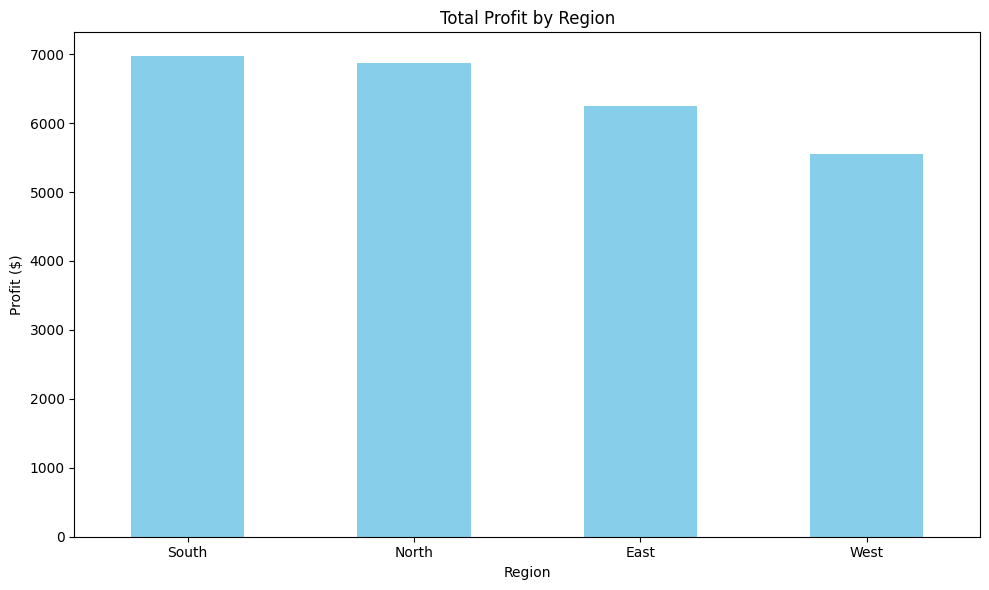

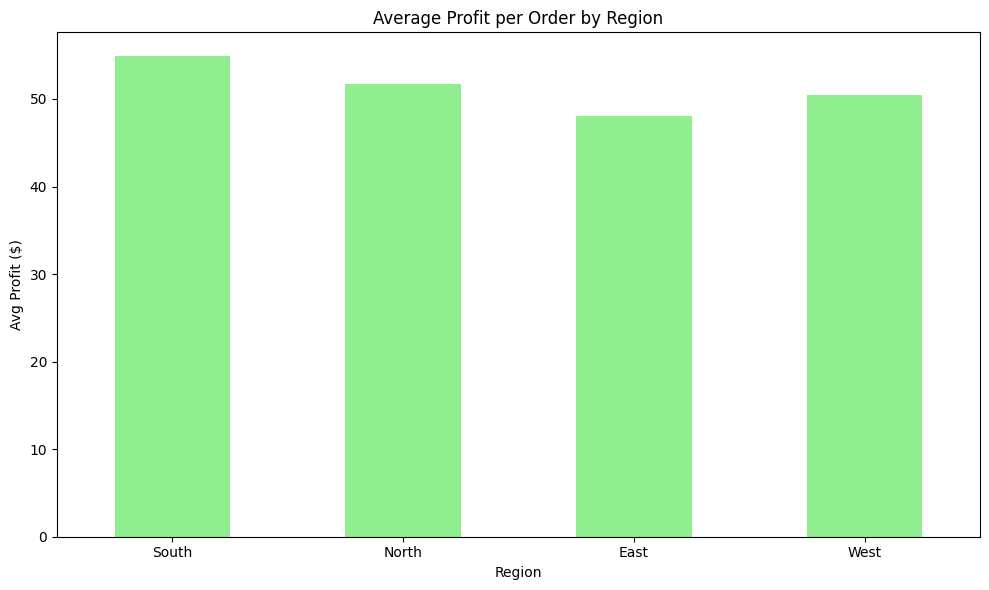

In [66]:
profit_margin = 0.20

data['profit'] = data['revenue'] * profit_margin
total_profit = data['profit'].sum()
profit_by_region = data.groupby('region')['profit'].sum()

most_profitable_region = profit_by_region.idxmax()
most_profit = profit_by_region.max()

profit_summary = data.groupby('region').agg(
    total_profit=pd.NamedAgg(column='profit', aggfunc='sum'),
    order_count=pd.NamedAgg(column='profit', aggfunc='count'),
    avg_revenue_per_order=pd.NamedAgg(column='revenue', aggfunc='mean'),
    avg_profit_per_order=pd.NamedAgg(column='profit', aggfunc='mean')
).sort_values(by='total_profit', ascending=False)

print("Profit Summary by Region:")
print(profit_summary)

print(f"\n")
print(f"Total Estimated Profit: ${total_profit:,.2f}")
print(f"Most Profitable Region: {most_profitable_region} with profit ${most_profit:,.2f}")

plt.figure(figsize=(10,6))
profit_summary['total_profit'].plot(kind='bar', color='skyblue')
plt.title('Total Profit by Region')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
profit_summary['avg_profit_per_order'].plot(kind='bar', color='lightgreen')
plt.title('Average Profit per Order by Region')
plt.ylabel('Avg Profit ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Q9. Interpretation: 

- The **South** region is the **most profitable**, generating approximately $6,967.89 in total profit from 127 orders. It also has the highest average revenue per order ($274.33) and average profit per order ($54.87), indicating both strong sales volume and high-value transactions.

- The **North** region is **a close second** with total profit of $6,870.34 from 133 orders. The average revenue ($258.28) and profit ($51.66) per order are slightly lower than South but still substantial, showing good profitability with a higher number of orders.

- The **East** region, with 130 orders, produces a total profit of $6,244.36, the lowest average revenue ($240.17), and profit per order ($48.03), suggesting a moderate volume and lower transaction size than the top two regions.

- The **West** region, with the fewest orders at 110, generates the **lowest total profit** ($5,545.55) yet has an average revenue ($252.07) and profit ($50.41) per order comparable to the North. This suggests fewer transactions but competitive order values.

- The **total estimated profit** across all regions is $25,628.13, with the **South** contributing about 27% alone, making it a key market.

**Business Insights:**

- Prioritizing marketing, inventory, and customer service focus on the South and North could maximize profit growth given their order volumes and transaction values.

- The East and West regions have potential for promotion and expansion to increase order counts while maintaining reasonable order values.

- Average profit per order is a critical metric showing each region's efficiency in converting sales to profit, guiding resource allocation for profitability improvement.

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

### All Business Recommendations:

- Focus marketing and resources on the South and North customer segments and regions, as they generate the highest overall profits, highest average order values, and exhibit strong customer engagement across product categories and payment types. Tailoring loyalty programs and promotional campaigns to these segments can maximize revenue growth while solidifying customer retention.

- Maintain diversified product offerings emphasizing Home and Electronics categories, which show both high sales volume and revenue, while leveraging Clothing's popularity for volume sales promotions. Target niche categories like Sports and Books with personalized campaigns for growth potential.

- Optimize discount strategies, since discounted orders yield higher average revenues, employing promotions with minimum thresholds, bundling, or time-limited offers to maximize order size without sacrificing margins.

- Ensure seamless payment experiences across diverse payment methods, especially targeting Debit and Credit Card users who transact higher average order values, while expanding incentives for PayPal users to uplift spend.

- Leverage insights on weekly seasonality by promoting steady engagement throughout the week, as weekends do not significantly outperform weekdays. This allows balanced marketing investments across all days to support consistent sales.

- Invest in regional personalization and inventory allocation, prioritizing South and North regions for marketing spend and stock, and exploring tailored regional strategies for East and West, to optimize profitability and customer satisfaction in diverse markets.

### Final Business Recommendation (1):

- **Focus marketing and customer loyalty efforts on the South region and Professional customer segment.**

This recommendation is supported by data showing the South region yields the highest total and average profits, while Professionals represent a large share of high-value, frequent buyers. Prioritizing this segment and region with tailored promotions, loyalty programs, and premium product offerings maximizes revenue and profitability efficiently.

Concentrating resources here leverages existing strengths and customer behaviors, providing the best return on investment and a strong foundation for expanding profitable growth before scaling to other segments or regions.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.